In [1]:
%reset -f

import sys
sys.path.append('../code')

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib
import helper_functions as util

from scipy.spatial.transform import Rotation as R

import pynumdiff
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']
plt.rcParams['text.usetex'] = False
plt.rcParams["ps.usedistiller"] = 'xpdf'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'normal'

%matplotlib inline

# from plot_utility import mathify_ticklabels


C:\Users\bcellini\Anaconda3\envs\wind-sense\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load data
fpath = r'C:\Users\bcellini\OneDrive - University of Nevada, Reno\Research\Code\bag\data\mat\hdf5\NEW_2022-07-27-22-07-46.hdf'
# test = pd.read_hdf(fpath)
f = h5py.File(fpath, 'r')

In [16]:
list(f.keys())
data = f['intrp'] # work with interpolated data
list(raw.keys())

['agf',
 'att',
 'avf',
 'gps',
 'gps_sync',
 'imu',
 'obtrs',
 'opt',
 'rc',
 'rtk_pos',
 'rtk_vel',
 'rtk_yaw',
 'utc_sync',
 'vel',
 'vo']

In [9]:
# Get topics and topic names
topics = []
topic_names = []
for k in test.keys():
    # print(k)
    topics.append(k)
    fullname = k[1:len(k)]
    splitname = fullname.split('/', 1)
    if (splitname[0] == "dji_osdk_ros") or (splitname[0] == "onboard_trisonica"):
        topic_names.append(splitname[1].replace('/','_'))
    else:
        topic_names.append(fullname.replace('/','_'))

In [14]:
imu_time = test.get('/dji_osdk_ros/imu/header/stamp/secs').values
# imu_time = imu_time - imu_time[0]
imu_orientation_w = test.get('/dji_osdk_ros/imu/orientation/w').values
imu_orientation_x = np.array(test.get('/dji_osdk_ros/imu/orientation/x').values)
imu_orientation_y = np.array(test.get('/dji_osdk_ros/imu/orientation/y').values)
imu_orientation_z = np.array(test.get('/dji_osdk_ros/imu/orientation/z').values)
# Q = np.block([[imu_orientation_w,imu_orientation_x,imu_orientation_x]])
Q = np.block([[imu_orientation_w], [imu_orientation_x], [imu_orientation_y], [imu_orientation_z]])
Q = Q.T
print(np.shape(Q))
#optic_flow = test.get('/optic_flow/vx/1')

print(imu_orientation_w)

# len(imu_orientation_w)

# R = util.euler_from_quaternion(1, 1, 1, 1)

# R = util.euler_from_quaternion(imu_orientation_x, imu_orientation_y, imu_orientation_z, imu_orientation_w)
# A = np.transpose([[1, 1], [1, 1], [1, 1], [1, 1]])
# r = R.from_quat(A)
# r = R.from_quat(Q)


(110542, 4)
[nan nan nan ... nan nan nan]


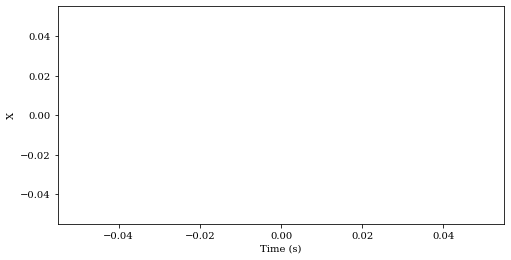

In [16]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(imu_time, imu_time,
        linewidth=1)
# ax.plot(imu_time, imu_orientation_z,
#         color='blue',
#         linewidth=1)
# ax.plot(t, x_truth, '-',
#         color='black',
#         linewidth=4)

ax.set_xlabel('Time (s)')
ax.set_ylabel('X')
plt.show()

# x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
# evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

In [8]:
# for k in test.keys():
#     print(k)

In [ ]:
noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
timeseries_length = 4
# simulate data

x, x_truth, dxdt_truth, _ = simulate.pi_control(dt=dt, timeseries_length=timeseries_length, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

RMS error in velocity:  6.820305856536254


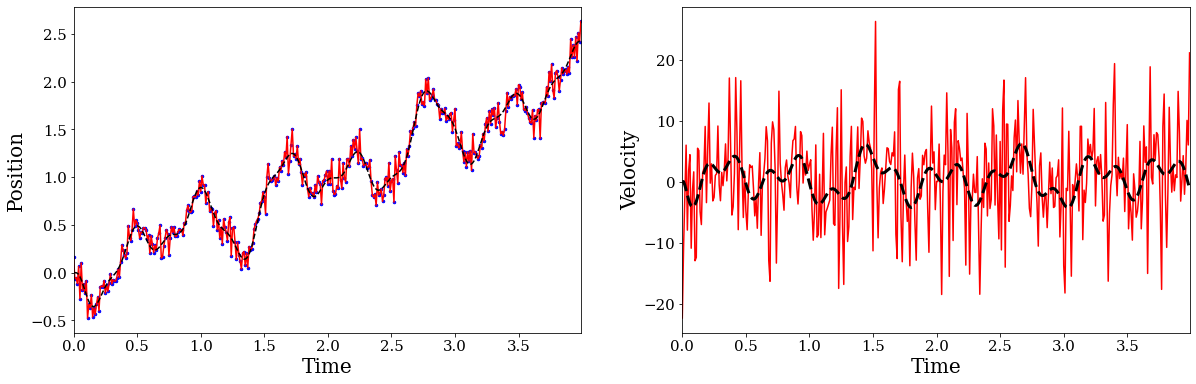

In [53]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)